In [1]:
import pandas
import numpy
import matplotlib
import matplotlib.style
matplotlib.style.use('ggplot')

%matplotlib inline

# Data preparation

In [2]:
try:
    students = pandas.read_csv('personal.csv', index_col=None)
except FileNotFoundError:
    students = pandas.read_csv('anonymous.csv', index_col='name')
else:
    import random
    import string
    students['name'] = students['name'].apply(lambda x: ''.join(random.choices(string.ascii_lowercase, k=8)))
    students['web'] = students['web'].notnull()
    students['gh'] = students['gh'].notnull()
    students['task'] = students['task'].notnull()
    students = students.reindex(numpy.random.permutation(students.index)).set_index('name')
    students.to_csv('anonymous.csv')
students['group'] = students['group'].apply(str)
students.replace(0, numpy.nan, inplace=True)
students.head()

,t01,t02,t03,t04,t05,t06,t07,t08,t09,t10,tasks,sem,extra,tot,mark,var,web,gh,task,group
name,,,,,,,,,,,,,,,,,,,,
evgrsntb,5.0,5.0,4.0,NaN,3.5,3.0,4.5,NaN,NaN,NaN,25.0,NaN,NaN,25.0,F,T,True,True,False,102
byhzgxnj,4.0,4.0,4.5,4.0,5.0,4.0,4.5,4.0,NaN,NaN,34.0,NaN,1.0,35.0,F,T,True,True,True,101
yghatkeb,5.0,5.0,4.5,NaN,NaN,5.0,3.0,1.0,NaN,NaN,23.5,NaN,NaN,23.5,F,T,True,True,False,101
cknuixjt,5.0,4.0,4.0,3.5,3.0,5.0,4.0,5.0,4.0,NaN,37.5,39.0,NaN,76.5,C,T,True,True,True,102
gdwtipua,5.0,4.0,5.0,4.0,3.0,4.0,4.5,1.5,4.0,NaN,35.0,55.0,NaN,90.0,A,T,True,True,True,102


In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, evgrsntb to wveloema
Data columns (total 20 columns):
t01      39 non-null float64
t02      39 non-null float64
t03      40 non-null float64
t04      24 non-null float64
t05      28 non-null float64
t06      37 non-null float64
t07      23 non-null float64
t08      16 non-null float64
t09      18 non-null float64
t10      6 non-null float64
tasks    41 non-null float64
sem      16 non-null float64
extra    13 non-null float64
tot      41 non-null float64
mark     46 non-null object
var      42 non-null object
web      46 non-null bool
gh       46 non-null bool
task     46 non-null bool
group    46 non-null object
dtypes: bool(3), float64(14), object(3)
memory usage: 6.6+ KB


# What the data means

 * **t01**-**t10**: Points for tasks
  * nobody was ever graded with 0, so NaN == not submitted
  * maximum was always 5
 * **tasks**: Sum of the above
 * **sem**: Points from semestral work (max 50, 56 with bonuses)
 * **extra**: Extra points for pull requests, extraordinery solution to a task, etc.
 * **tot**: Total number of points (*tasks*+*sem*+*extra*)
 * **mark**: Final mark
  * F: bellow 50 (or *tasks*<25 or *sem*<25, but that never happened with *tot* over 49)
  * E: 50-59
  * D: 60-69
  * C: 70-79
  * B: 80-89
  * A: 90+
 * **var**: topic of *t01* to *t05*
  * *G* for GitHub issues bot
  * *T* for Twitter Wall
  * *custom* for custom topic (once selected, not submitted)
  * *NaN* for not even selected
 * **web**: whether the student deployed *t02* to the Interwebz
 * **gh**: whether we had a link to student's GitHub profile
 * **task**: whether student had an approved semestral task
 * **group**: *101* for 11:00-13:15, *102* for 13:30-15:45

# Tasks

In [4]:
TASKS = ['t{:02d}'.format(n) for n in range(1, 11)]
described_tasks = students.loc[:, TASKS].describe().T
described_tasks

,count,mean,std,min,25%,50%,75%,max
t01,39.0,4.717949,0.497294,3.0,4.500,5.00,5.000,5.0
t02,39.0,4.512821,0.782096,2.0,4.000,5.00,5.000,5.0
t03,40.0,4.487500,0.763658,2.0,4.375,5.00,5.000,5.0
t04,24.0,3.437500,1.534477,0.5,2.000,4.00,4.500,5.0
t05,28.0,3.857143,0.989361,1.0,3.375,4.00,4.625,5.0
t06,37.0,4.108108,0.800478,2.0,4.000,4.00,5.000,5.0
t07,23.0,4.282609,0.560562,3.0,4.000,4.50,4.500,5.0
t08,16.0,3.031250,1.978794,0.5,0.875,4.00,5.000,5.0
t09,18.0,3.972222,0.812987,1.5,3.625,4.00,4.500,5.0
t10,6.0,3.916667,1.200694,2.0,3.250,4.25,4.875,5.0


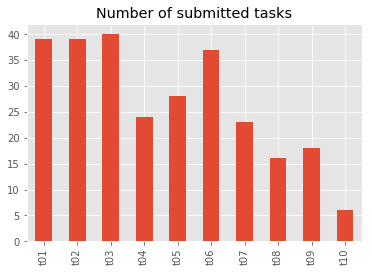

In [5]:
described_tasks['count'].plot.bar(title='Number of submitted tasks')

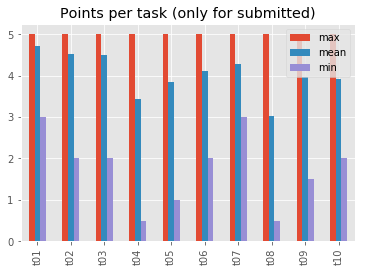

In [6]:
described_tasks.loc[:, ['max', 'mean', 'min']].plot.bar(title='Points per task (only for submitted)')

In [7]:
students.loc[:, ['tasks', 'tot', 'var']].groupby('var').describe().rename({'G': 'github', 'T': 'twitter'})

tasks         tot
var                                 
github  count  14.000000   14.000000
        mean   27.535714   46.357143
        std     8.636827   29.540994
        min    10.000000   10.000000
        25%    23.375000   24.000000
        50%    29.000000   32.250000
        75%    34.000000   73.500000
        max    38.000000   90.000000
twitter count  27.000000   27.000000
        mean   27.351852   44.888889
        std    10.234571   31.605542
        min     4.500000    4.500000
        25%    21.500000   21.500000
        50%    27.000000   27.500000
        75%    34.750000   75.750000
        max    48.500000  108.500000
custom  count   0.000000    0.000000
        mean         NaN         NaN
        std          NaN         NaN
        min          NaN         NaN
        25%          NaN         NaN
        50%          NaN         NaN
        75%          NaN         NaN
        max          NaN         NaN

# Total points

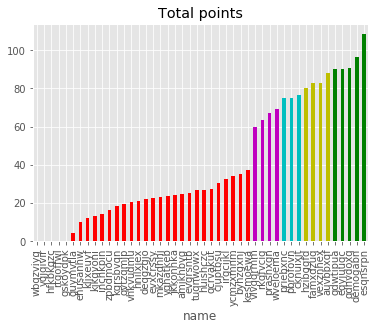

In [8]:
colors = {'A': 'g', 'B': 'y', 'C': 'c', 'D': 'm', 'E': 'k', 'F': 'r'}
df = students.loc[:, ['tot', 'mark']].fillna(0).sort_values(by='tot')
df['tot'].plot(kind='bar', color=[colors[i] for i in df['mark']], title='Total points')

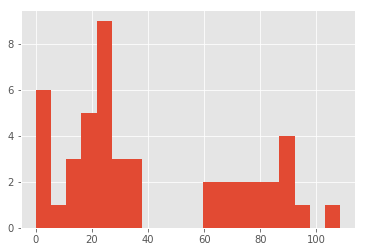

In [9]:
students['tot'].fillna(0).hist(bins=20)

# Semestral work

Stats for submitted only:

In [10]:
pandas.DataFrame({'sem': {'had_topic': students['task'].sum()}}).append(
    students.loc[:, ['sem']].describe()).rename({'count': 'submitted'})

,sem
had_topic,25.000000
submitted,16.000000
mean,45.062500
std,8.028854
min,25.000000
25%,40.000000
50%,45.500000
75%,51.000000
max,56.000000


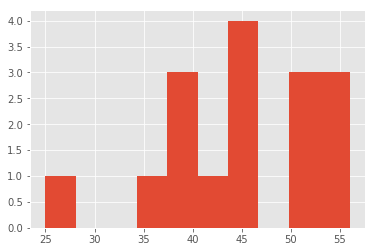

In [11]:
students['sem'].hist(bins=10)

Stats for selected topic:

In [12]:
students.loc[students['task'] == True].loc[:, ['sem']].fillna(0).describe()

,sem
count,25.000000
mean,28.840000
std,22.970416
min,0.000000
25%,0.000000
50%,40.000000
75%,46.000000
max,56.000000
